In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns=['Frequency','Angle of attack','chord_len','Free_vel','Suction','scaled_sound_pressure']

In [5]:
df.head()

,Frequency,Angle of attack,chord_len,Free_vel,Suction,scaled_sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
# before doing correlation, always do train test split

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Doing EDA

In [9]:
import seaborn as sns

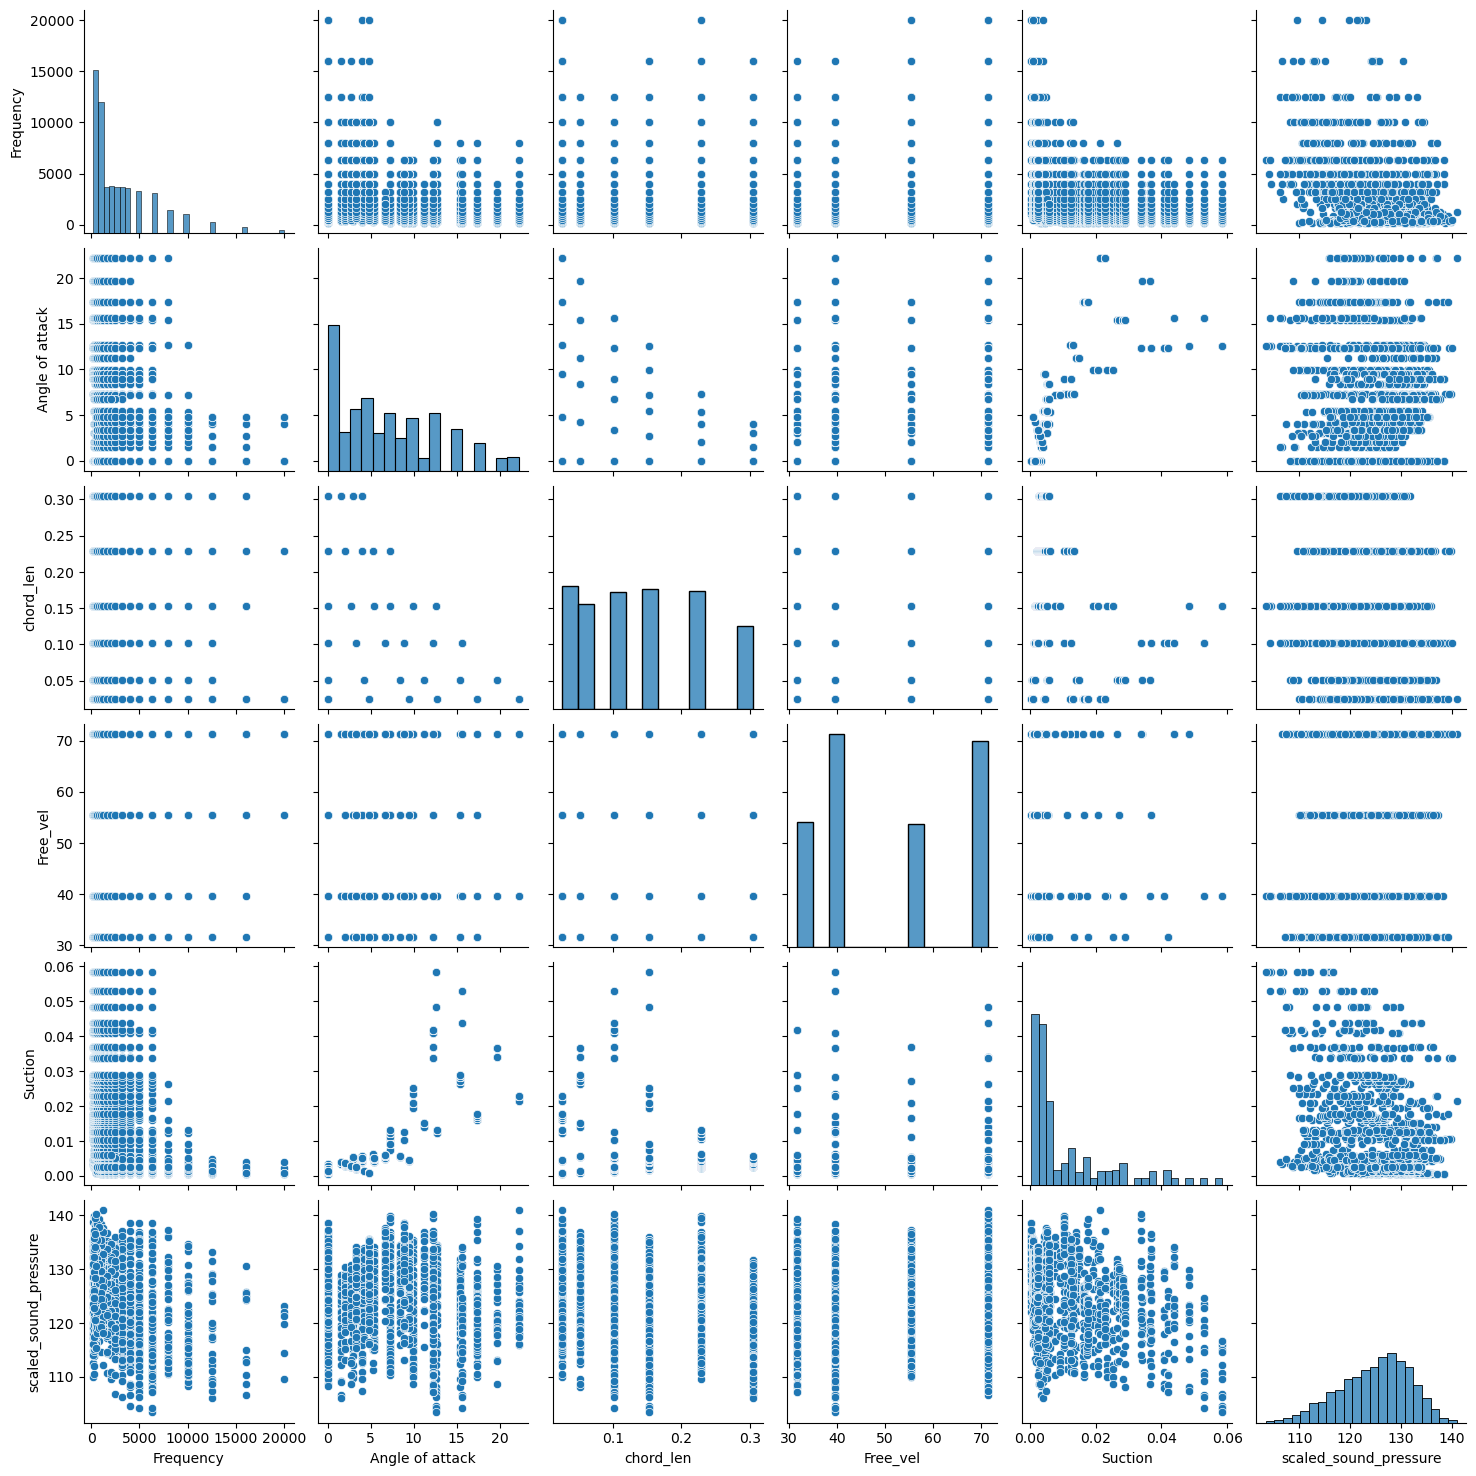

In [10]:

sns.pairplot(df)

In [11]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,chord_len,Free_vel,Suction
Frequency,1.000000,-0.273389,0.006518,0.136027,-0.240358
Angle of attack,-0.273389,1.000000,-0.501654,0.048547,0.757979
chord_len,0.006518,-0.501654,1.000000,0.031203,-0.224635
Free_vel,0.136027,0.048547,0.031203,1.000000,0.011346
Suction,-0.240358,0.757979,-0.224635,0.011346,1.000000


In [12]:
sns.scatterplot(X_train['Frequency'],y)

c:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='scaled_sound_pressure'>

In [13]:
sns.boxplot(X_train['Free_vel'])

c:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Free_vel', ylabel='scaled_sound_pressure'>

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
regressor.predict(X_test)

array([126.26793707, 120.3530189 , 117.99085672, 129.1931764 ,
       124.84567813, 129.1861935 , 120.23678774, 133.33426122,
       119.54854843, 126.14823325, 125.09364671, 126.82354139,
       132.54761653, 121.12909942, 123.82200524, 119.05127743,
       128.7632825 , 123.11383488, 118.20625538, 125.28214482,
       122.33154253, 127.4632006 , 127.43496365, 126.17716448,
       128.98568796, 122.7508753 , 116.62263772, 126.86200161,
       128.14646306, 126.25095491, 129.85011012, 123.96063978,
       109.47069883, 127.66011245, 127.89722092, 129.8623149 ,
       119.81652095, 103.85099329, 127.01748688, 129.85222526,
       131.97115646, 123.02251685, 125.11083177, 118.93343731,
       116.37492568, 131.45866793, 126.67096228, 130.03694729,
       131.82043373, 123.3481441 , 120.67371864, 124.52684195,
       118.55684689, 124.74399371, 122.29011579, 123.65655937,
       113.74021344, 125.7412299 , 124.29184597, 120.38673722,
       125.42184157, 125.44664802, 127.8625653 , 130.62

In [23]:
X_test

,Frequency,Angle of attack,chord_len,Free_vel,Suction
968,10000,0.0,0.0254,71.3,0.000401
9,6300,0.0,0.3048,71.3,0.002663
1468,2500,12.3,0.1016,31.7,0.041876
1150,400,17.4,0.0254,71.3,0.016104
880,2500,15.4,0.0508,71.3,0.026427
...,...,...,...,...,...
1032,800,4.8,0.0254,39.6,0.000907
75,6300,1.5,0.3048,71.3,0.003367
602,1250,7.2,0.1524,71.3,0.007520
1296,1250,3.3,0.1016,71.3,0.002028


# Pickle
### It is used to convert the model in serialized format and save it in Bytes


In [20]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [21]:
# Loading the pickle file

In [24]:
# Batch input
pickled_model=pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

array([126.26793707, 120.3530189 , 117.99085672, 129.1931764 ,
       124.84567813, 129.1861935 , 120.23678774, 133.33426122,
       119.54854843, 126.14823325, 125.09364671, 126.82354139,
       132.54761653, 121.12909942, 123.82200524, 119.05127743,
       128.7632825 , 123.11383488, 118.20625538, 125.28214482,
       122.33154253, 127.4632006 , 127.43496365, 126.17716448,
       128.98568796, 122.7508753 , 116.62263772, 126.86200161,
       128.14646306, 126.25095491, 129.85011012, 123.96063978,
       109.47069883, 127.66011245, 127.89722092, 129.8623149 ,
       119.81652095, 103.85099329, 127.01748688, 129.85222526,
       131.97115646, 123.02251685, 125.11083177, 118.93343731,
       116.37492568, 131.45866793, 126.67096228, 130.03694729,
       131.82043373, 123.3481441 , 120.67371864, 124.52684195,
       118.55684689, 124.74399371, 122.29011579, 123.65655937,
       113.74021344, 125.7412299 , 124.29184597, 120.38673722,
       125.42184157, 125.44664802, 127.8625653 , 130.62

In [25]:
dict_test={
  "Frequency":9 ,
  "Angle of attack":8 ,	
  "chord_len":10 ,	
  "Free_vel":1 ,	
  "Suction":7  
}

In [30]:
dict_test.values()


dict_values([9, 8, 10, 1, 7])

In [29]:
dict_test.keys()

dict_keys(['Frequency', 'Angle of attack', 'chord_len', 'Free_vel', 'Suction'])

In [32]:
list(dict_test.values())

[9, 8, 10, 1, 7]

In [34]:
# for predicting the output from these input features , we have to convert this one dimensional array to 2 dimensional array.
## adding one additional square breackets will help to convert this 1-d array to 2-d array
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

### The value of output has been predicted based on single input 

In [36]:
pickled_model.predict([[9, 8, 10, 1, 7]])[0]   # [0] is being used to get the 

c:\Users\abhin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-1278.6689465571556